In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]

In [5]:
ndim, nwalkers = 2, 5
log_sigma0 = np.random.uniform(low=-40, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=4, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((5,))
p0[:,1]= log_mchi.reshape((5,))
p0

array([[-15.611418  ,   1.30099046],
       [-34.05951363,   3.41230096],
       [-22.54863064,  -8.52020815],
       [-16.90170672,  -7.19181117],
       [-33.11896392,  -8.8264559 ]])

In [23]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters])

In [24]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/eleanorstuart/Desktop/krisp/thermo-idm/cluster.py:26: RuntimeWarning: overflow encountered in float_power
  m_chi = np.float_power(10, p0[1])*u.GeV
/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  resul

TypeError: Cannot cast array data from dtype('float128') to dtype('float64') according to the rule 'safe'

emcee: Exception while calling your likelihood function:
  params: [ 57.5230553  268.39385881]
  args: [[<Quantity 1.13369052e-05 GeV>, <Quantity 8.96643311e-06 GeV>, <Quantity 9.07989976e-06 GeV>, <Quantity 8.10745427e-06 GeV>, <Quantity 7.41285088e-06 GeV>, <Quantity 8.20368656e-06 GeV>, <Quantity 8.22529573e-06 GeV>, <Quantity 7.72504935e-06 GeV>, <Quantity 7.33483838e-06 GeV>, <Quantity 6.21106042e-06 GeV>, <Quantity 7.48240004e-06 GeV>, <Quantity 7.2500303e-06 GeV>, <Quantity 7.74834976e-06 GeV>, <Quantity 8.05491993e-06 GeV>, <Quantity 5.92439129e-06 GeV>, <Quantity 5.61144568e-06 GeV>, <Quantity 5.38610788e-06 GeV>, <Quantity 3.24632308e-06 GeV>, <Quantity 4.88330641e-06 GeV>, <Quantity 5.85577809e-06 GeV>], <Quantity [1.78502685e-07, 2.35634568e-07, 5.57547959e-08, 1.21818584e-07,
           1.68853374e-07, 1.30965586e-07, 2.72902590e-07, 1.82883513e-07,
           1.51813088e-07, 7.00764091e-08, 2.34699973e-07, 1.71323924e-07,
           4.14287923e-07, 1.27262191e-06, 1.40952

Traceback (most recent call last):
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/statistics_functions.py", line 28, in log_likelihood
    T_model = [c.pred_T_b(p0) for c in clusters]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/statistics_functions.py", line 28, in <listcomp>
    T_model = [c.pred_T_b(p0) for c in clusters]
               ^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/cluster.py", line 193, in pred_T_b
    solution=root(fun, x0, args=(self, p0)).x
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/scipy/optimize/_root.py", line 236, in root
    sol = _root_hybr(fun, x0, args=args, jac=jac, **opt

error: Result from function call is not a proper array of floats.

In [16]:
n_steps=500
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


State([[-1.57581531e+58  4.31631495e+57]
 [-2.58317911e+59  7.07558465e+58]
 [-1.99291308e+01 -6.47511362e+01]
 [-2.53132809e+58  6.93355954e+57]
 [ 2.05439323e+58 -5.62718751e+57]], log_prob=[-7131.62552308 -7131.62552308 -2130.37197066 -7131.62552308
 -7131.62552308], blobs=None, random_state=('MT19937', array([3942967667, 1917121480, 1026338510,  171647026, 3619785900,
       2592493783, 3923704198, 3542772777,  848331384, 1217275034,
        844623048, 3717390371, 4182058522, 4083314221, 3059091941,
       2678459385, 3199078930, 1019262744, 1655276920, 3180180582,
       3017538392,  967501890, 2665470934, 3417518625, 1547804021,
       3618188854, 2091128784, 3618143577, 4223441690, 2236793308,
       1313886119, 2987104076, 2758478516, 1180149068, 3755981389,
       1816046237, 4164586631, 1003642359, 1553559239,  571153117,
       2938402642,  800359111,  670869358,  669339724, 1680762154,
       3060473488, 3791845154,  797896238,  372170484, 1875639493,
       2644934725, 224

In [17]:
samples = sampler.get_chain(flat=True)

In [18]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.716


(130, 2)


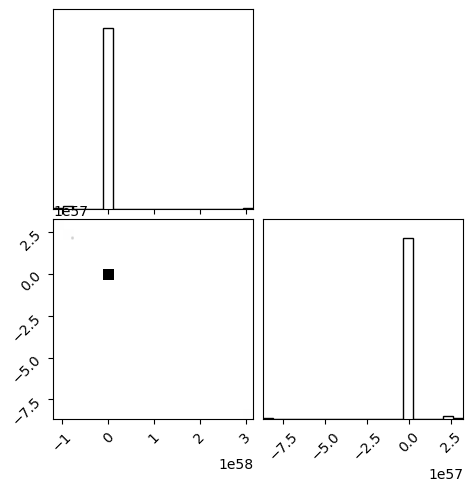

In [21]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [22]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-19.929130812209436, -64.75113622960508)